In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、Axes3D.bar：

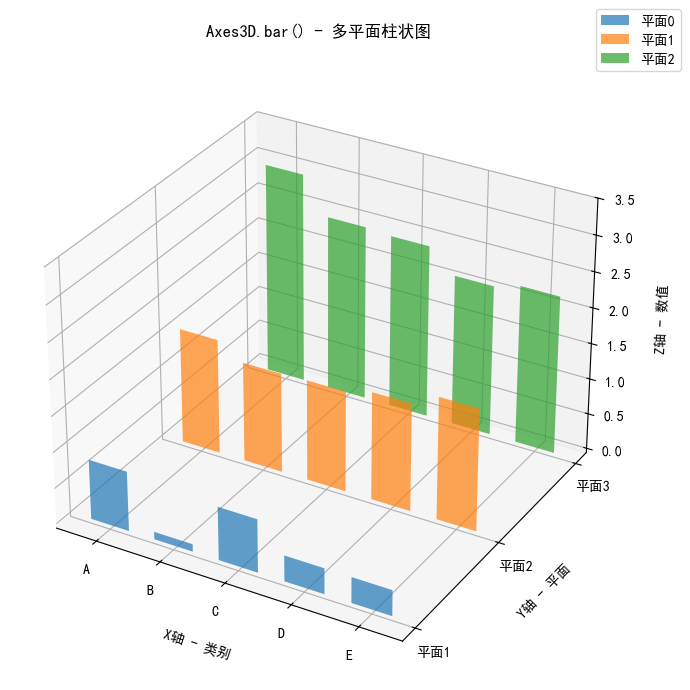

In [3]:
# 设置随机种子
np.random.seed(44)

# 创建图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 生成并绘制多平面柱状图
for i in range(3):
    y = np.random.rand(5) + i  # 每个平面的高度数据
    ax.bar(
        np.arange(5),          # X轴上的位置，这里是0-4的整数，代表5个类别
        y,                     # 柱子的高度值（沿Z轴方向）
        zs=i,                  # 柱子在Y轴上的位置，每个循环i值不同，形成不同平面
        zdir='y',              # 指定哪个轴作为"深度"方向，这里Y轴为深度方向
        width=0.6,             # 柱子在X轴方向的宽度
        alpha=0.7,             # 柱子的透明度（0-1之间）
        label=f'平面{i}'       # 为每个平面的柱子添加标签，用于图例显示
          )

# 设置坐标轴刻度和标签
ax.set_xticks(np.arange(5),['A','B','C','D','E'])
ax.set_yticks(np.arange(3),['平面1','平面2','平面3'])
ax.set_zticks(np.arange(0, 4, 0.5))

# 设置坐标轴标签
ax.set_xlabel('X轴 - 类别', labelpad=10)
ax.set_ylabel('Y轴 - 平面', labelpad=10)
ax.set_zlabel('Z轴 - 数值', labelpad=10)

# 设置标题和图例
ax.set_title('Axes3D.bar() - 多平面柱状图', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# # 调整视角
# ax.view_init(elev=25, azim=45)  # 仰角25度，方位角45度

plt.show()

### 沿不同轴延伸的柱状图

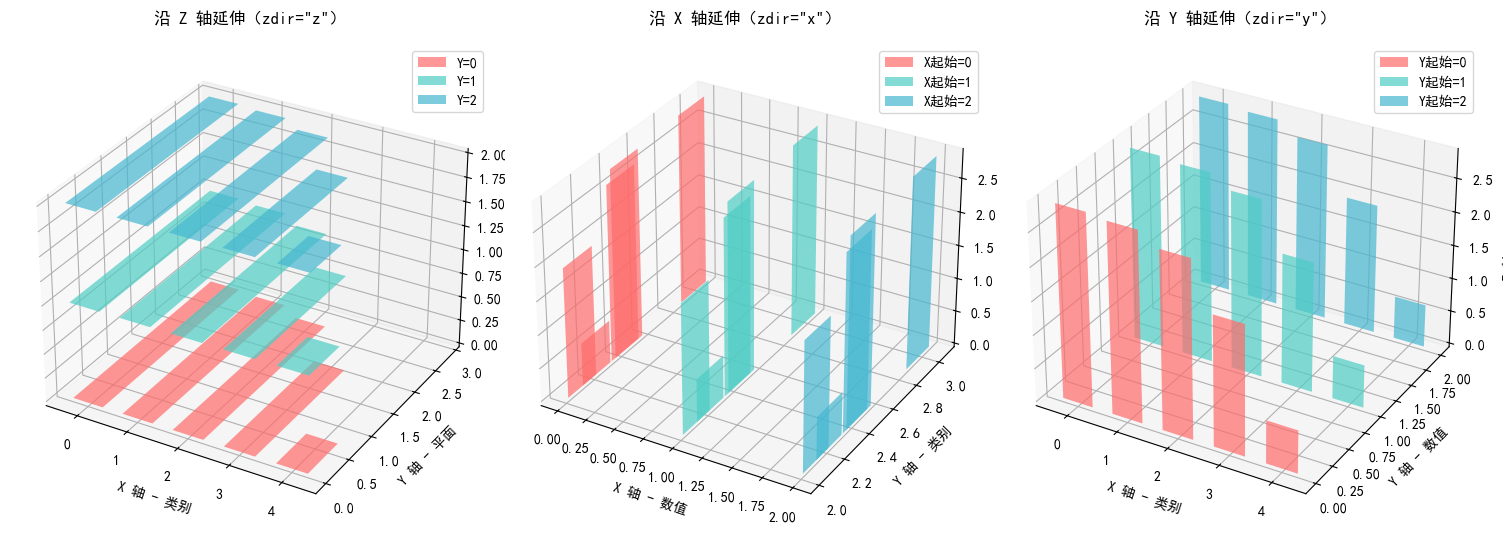

In [4]:
# 生成基础数据：5个类别，3个平面
x = np.arange(5)  # X轴类别（0-4）
height = np.random.rand(5) * 3  # 柱子的“高度”（延伸方向的长度）
zs_list = [0, 1, 2]  # 3个不同的起始位置（用于区分平面）
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # 三种颜色区分平面

# 创建2x2画布，对比三种延伸方向
fig = plt.figure(figsize=(15, 10))

# 1. 沿 Z 轴延伸（默认 zdir='z'）
ax1 = fig.add_subplot(131, projection='3d')
for i, zs in enumerate(zs_list):
    ax1.bar(
        left=x,               # 柱子在 X 轴的位置
        height=height,        # 柱子沿 Z 轴的高度
        zs=zs,                # 柱子底部的 Y 轴位置（因 zdir='z'，Y 轴为“平面轴”）
        zdir='z',             # 延伸方向：Z 轴
        width=0.6,            # 柱子在 X 轴的宽度
        alpha=0.7,            # 透明度
        color=colors[i],
        label=f'Y={zs}'
    )
ax1.set_title('沿 Z 轴延伸（zdir="z"）', pad=15)
ax1.set_xlabel('X 轴 - 类别')
ax1.set_ylabel('Y 轴 - 平面')
ax1.set_zlabel('Z 轴 - 数值')
ax1.legend()

# 2. 沿 X 轴延伸（zdir='x'）
ax2 = fig.add_subplot(132, projection='3d')
for i, zs in enumerate(zs_list):
    ax2.bar(
        left=y,               # 柱子在 Y 轴的位置（因 zdir='x'，Y 轴为“类别轴”）
        height=height,        # 柱子沿 X 轴的长度
        zs=zs,                # 柱子底部的 X 轴起始位置
        zdir='x',             # 延伸方向：X 轴
        width=0.2,            # 柱子在 Y 轴的宽度
        alpha=0.7,
        color=colors[i],
        label=f'X起始={zs}'
    )
ax2.set_title('沿 X 轴延伸（zdir="x"）', pad=15)
ax2.set_xlabel('X 轴 - 数值')
ax2.set_ylabel('Y 轴 - 类别')
ax2.set_zlabel('Z 轴 - 辅助')
ax2.legend()

# 3. 沿 Y 轴延伸（zdir='y'）
ax3 = fig.add_subplot(133, projection='3d')
for i, zs in enumerate(zs_list):
    ax3.bar(
        left=x,               # 柱子在 X 轴的位置
        height=height,        # 柱子沿 Y 轴的长度
        zs=zs,                # 柱子底部的 Y 轴起始位置
        zdir='y',             # 延伸方向：Y 轴
        width=0.6,
        alpha=0.7,
        color=colors[i],
        label=f'Y起始={zs}'
    )
ax3.set_title('沿 Y 轴延伸（zdir="y"）', pad=15)
ax3.set_xlabel('X 轴 - 类别')
ax3.set_ylabel('Y 轴 - 数值')
ax3.set_zlabel('Z 轴 - 辅助')
ax3.legend()

plt.tight_layout()
plt.show()

# 2、Axes3D.bar3d：

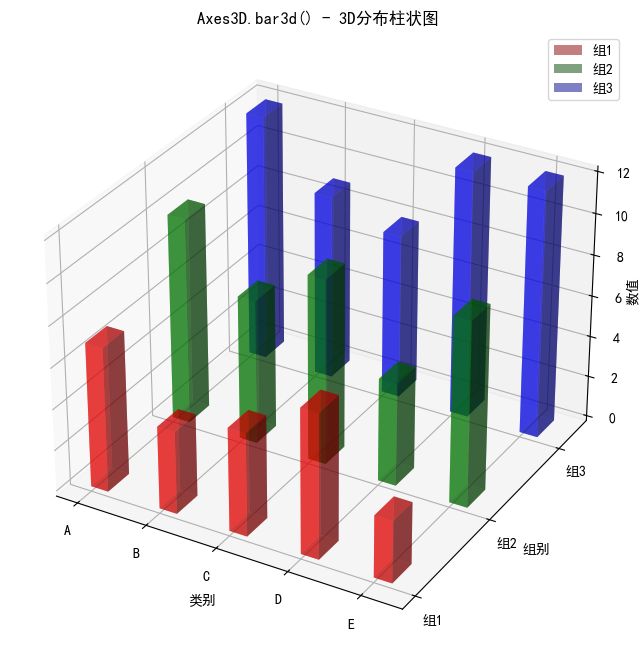

In [5]:
# 生成数据
# 定义类别标签
categories = np.array(['A', 'B', 'C', 'D', 'E'])
# 生成与类别数量对应的X轴位置（0,1,2,3,4）
x = np.arange(len(categories))
# 设置第一组数据在Y轴上的位置（全部为1）
y1 = np.ones_like(x) * 1
# 设置第二组数据在Y轴上的位置（全部为2）
y2 = np.ones_like(x) * 2
# 设置第三组数据在Y轴上的位置（全部为3）
y3 = np.ones_like(x) * 3

# 所有柱子的底部在Z轴上的起始位置（从0开始）
z = np.zeros_like(x)
# 柱子在X轴方向的宽度
dx = 0.25
# 柱子在Y轴方向的宽度
dy = 0.25

# 三组数据的高度值（Z轴方向）
np.random.seed(42)
# 第一组数据高度：1-7之间的随机整数
dz1 = np.random.randint(1, 8, size=len(x))
# 第二组数据高度：3-11之间的随机整数
dz2 = np.random.randint(3, 12, size=len(x))
# 第三组数据高度：5-14之间的随机整数
dz3 = np.random.randint(5, 15, size=len(x))

# 创建图形
fig = plt.figure(figsize=(10, 8))
# 添加3D子图
ax = fig.add_subplot(111, projection='3d')

# 绘制三组数据的柱状图
# 绘制第一组数据
ax.bar3d(
    x,          # 柱子底部中心的X坐标
    y1,         # 柱子底部中心的Y坐标
    z,          # 柱子底部中心的Z坐标（起始高度）
    dx,         # 柱子在X方向的宽度
    dy,         # 柱子在Y方向的宽度
    dz1,        # 柱子在Z方向的高度
    color='r',  # 柱子颜色
    alpha=0.5,  # 透明度
    label='组1' # 标签，用于图例
)
# 绘制第二组数据
ax.bar3d(x, y2, z, dx, dy, dz2, color='g', alpha=0.5, label='组2')
# 绘制第三组数据
ax.bar3d(x, y3, z, dx, dy, dz3, color='b', alpha=0.5, label='组3')

# 设置坐标轴标签、标题
ax.set_xlabel('类别')
ax.set_ylabel('组别')
ax.set_zlabel('数值', labelpad=-3,rotation=90)
ax.set_title('Axes3D.bar3d() - 3D分布柱状图')

# 设置x轴刻度标签
ax.set_xticks(x)
ax.set_xticklabels(categories) 

# 设置y轴刻度
ax.set_yticks([1, 2, 3]) 
ax.set_yticklabels(['组1', '组2', '组3'])

# 添加图例
ax.legend()
plt.show()

### 自定义颜色和光照

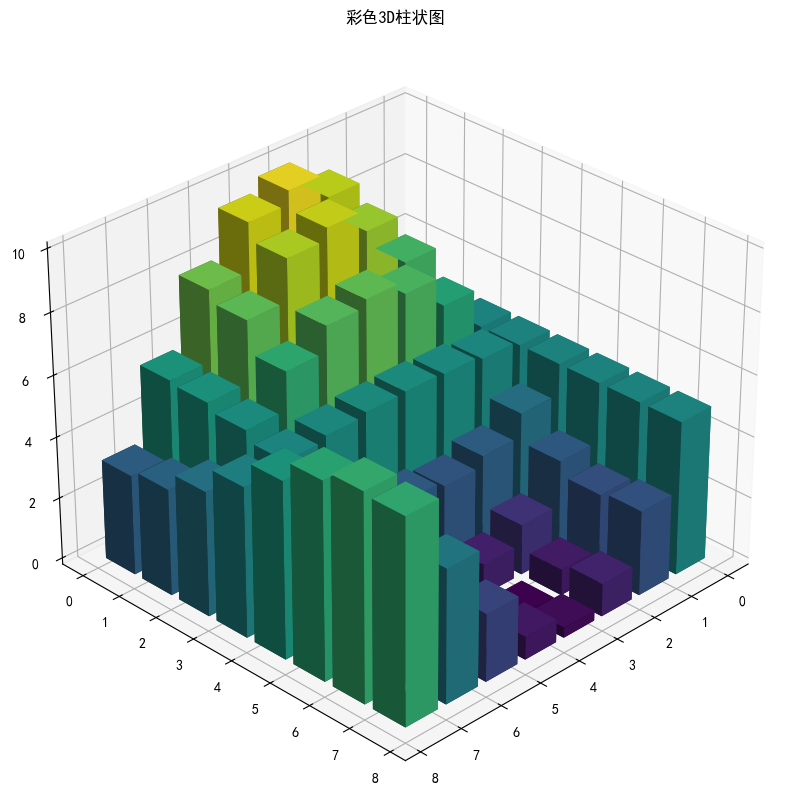

In [6]:
# 生成数据
# 创建X轴数据点（0到7的整数）
x = np.arange(8)
# 创建Y轴数据点（0到7的整数）
y = np.arange(8)
# 生成8x8的网格数据，将x和y从一维数组转换为二维网格
x, y = np.meshgrid(x, y)
# 将二维网格展平为一维数组，适应bar3d的输入要求
x = x.flatten()
y = y.flatten()
# 设置所有柱子的底部Z坐标为0（从Z=0开始绘制）
z = np.zeros_like(x)
# 设置柱子在X和Y方向的宽度均为0.8
dx = dy = 0.8
# 生成有规律的高度数据：使用正弦和余弦函数创建平滑变化的高度
dz = np.sin(x/2) * np.cos(y/2) * 5 + 5  

# 根据高度（高度归一化）生成颜色
colors = plt.cm.viridis(dz / dz.max())

# 创建图形
fig = plt.figure(figsize=(12, 10))
# 添加3D子图
ax = fig.add_subplot(111, projection='3d')

# 绘制3D柱状图
ax.bar3d(
    x, y, z,               # 柱子底部中心坐标（x, y, z）
    dx, dy, dz,            # 柱子在x, y, z方向的尺寸
    color=colors,          # 每个柱子的颜色（来自颜色映射）
    shade=True,            # 启用阴影效果，增强3D立体感
    # 设置光源方向：方位角315度（从左上方照射），高度角45度
    lightsource=plt.matplotlib.colors.LightSource(azdeg=315, altdeg=45)
)

# 设置视角
# elev=30：仰角30度（从下方仰视的角度）
# azim=45：方位角45度（绕Z轴旋转的角度）
ax.view_init(elev=30, azim=45)

ax.set_title('彩色3D柱状图')

plt.show()